## Average pass length

In [2]:
# Imports 
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import all the seasons
damallsvenskan = pd.read_csv('csv/damallsvenskan_all.csv')
allsvenskan = pd.read_csv('csv/allsvenskan_all.csv')

In [4]:
#Get the average length of a pass

total_pass_length_damallsvenskan = damallsvenskan[damallsvenskan['action'] == 'Pass accurate']
totalpasses = 0
pass_length_tot = 0
for index, row in total_pass_length_damallsvenskan.iterrows():
  pass_length_tot += ((row["xpos"] - row["xdest"])**2 + (row["ypos"] - row["ydest"])**2)**0.5
  totalpasses += 1

print(totalpasses)
print(pass_length_tot)
print("Average " , pass_length_tot / totalpasses)

498218
11251448.614551177
Average  22.58338441114367


In [5]:
#Get the average length of a pass

total_pass_length_allsvenskan = allsvenskan[allsvenskan['action'] == 'Pass accurate']
totalpasses = 0
pass_length_tot = 0
for index, row in total_pass_length_allsvenskan.iterrows():
  pass_length_tot += ((row["xpos"] - row["xdest"])**2 + (row["ypos"] - row["ydest"])**2)**0.5
  totalpasses += 1

print(totalpasses)
print(pass_length_tot)
print("Average " , pass_length_tot / totalpasses)


972220
22924705.88712539
Average  23.57975138047499


# Pass Flow motifs - Damallsvenskan

In [6]:
# Five possible flow motifs involving 3 passes:
# ABAB ABAC ABCA ABCB ABCD

successful_passes = 0
playerlist = []
total_pass_flow_motives = 0
Abab = 0
Abac = 0
Abca = 0
Abcb = 0
Abcd = 0
for index, row in damallsvenskan.iterrows():
  if row["action"] == "Pass accurate":
    if successful_passes == 0:
      playerlist.append(row["player"])
      playerlist.append(row["next_player"])
    else:
      playerlist.append(row["next_player"])
    successful_passes += 1
  else:
    successful_passes = 0
    playerlist = []
  if successful_passes >= 3:
    total_pass_flow_motives += 1
    if playerlist[2] == playerlist[0] and playerlist[1] == playerlist[3]:
      Abab += 1
    elif playerlist[0] == playerlist[2] and playerlist[1] != playerlist[3]:
      Abac += 1 
    elif playerlist[0] == playerlist[3]:
      Abca += 1
    elif playerlist[1] == playerlist[3]:
      Abcb += 1
    else:
      Abcd += 1
    playerlist.pop()

print ("Total pass flow motives: " , total_pass_flow_motives)
print("Abab: " , Abab)
print("Abac: " , Abac)
print("Abca: " , Abca)
print("Abcb: " , Abcb)
print("Abcd: " , Abcd)  
print("Procentages: " )


Total pass flow motives:  165187
Abab:  3905
Abac:  26637
Abca:  11777
Abcb:  15456
Abcd:  107412
Procentages: 



  Pass flow motive       ABAB      ABAC      ABCA       ABCB      ABCD
------------------  ---------  --------  --------  ---------  --------
Amount of passes    3905       26637     11777     15456      107412
% of passes         0.0236399  0.161254  0.071295  0.0935667  0.650245


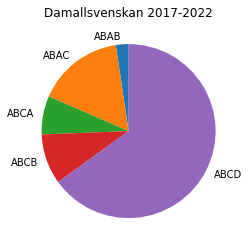

In [7]:
#plot the data
from tabulate import tabulate
print()
table = [['Pass flow motive','ABAB', 'ABAC', 'ABCA', 'ABCB', 'ABCD'], ['Amount of passes', Abab,Abac,Abca,Abcb,Abcd], ["% of passes" ,Abab/total_pass_flow_motives,Abac/total_pass_flow_motives,Abca/total_pass_flow_motives,Abcb/total_pass_flow_motives,Abcd/total_pass_flow_motives]]
print(tabulate(table, headers='firstrow', tablefmt='simple_grid', colalign='center'))

y = np.array([Abab/total_pass_flow_motives,Abac/total_pass_flow_motives,Abca/total_pass_flow_motives,Abcb/total_pass_flow_motives,Abcd/total_pass_flow_motives])
mylabels = ["ABAB", "ABAC", "ABCA", "ABCB", "ABCD"]
plt.title("Damallsvenskan 2017-2022")
plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 


## Pass flow motive - Herrallsvenskan

In [8]:
# Five possible flow motifs involving 3 passes:
# ABAB ABAC ABCA ABCB ABCD

successful_passes = 0
playerlist = []
total_pass_flow_motives = 0
Abab = 0
Abac = 0
Abca = 0
Abcb = 0
Abcd = 0
for index, row in allsvenskan.iterrows():
  if row["action"] == "Pass accurate":
    if successful_passes == 0:
      playerlist.append(row["player"])
      playerlist.append(row["next_player"])
    else:
      playerlist.append(row["next_player"])
    successful_passes += 1
  else:
    successful_passes = 0
    playerlist = []
  if successful_passes >= 3:
    total_pass_flow_motives += 1
    if playerlist[2] == playerlist[0] and playerlist[1] == playerlist[3]:
      Abab += 1
    elif playerlist[0] == playerlist[2] and playerlist[1] != playerlist[3]:
      Abac += 1 
    elif playerlist[0] == playerlist[3]:
      Abca += 1
    elif playerlist[1] == playerlist[3]:
      Abcb += 1
    else:
      Abcd += 1
    playerlist.pop()

print ("Total pass flow motives: " , total_pass_flow_motives)
print("Abab: " , Abab)
print("Abac: " , Abac)
print("Abca: " , Abca)
print("Abcb: " , Abcb)
print("Abcd: " , Abcd)  
print("Procentages: " )

Total pass flow motives:  425042
Abab:  9616
Abac:  69792
Abca:  30483
Abcb:  40656
Abcd:  274495
Procentages: 



  Pass flow motive       ABAB    ABAC       ABCA       ABCB      ABCD
------------------  ---------  ------  ---------  ---------  --------
Amount of passes    9616       69792   30483      40656      274495
% of passes         0.0226236  0.1642  0.0717176  0.0956517  0.645807


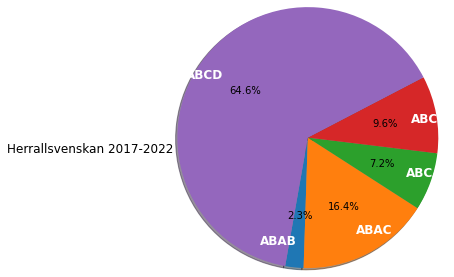

In [56]:
#plot the data
from tabulate import tabulate
print()
table = [['Pass flow motive','ABAB', 'ABAC', 'ABCA', 'ABCB', 'ABCD'], ['Amount of passes', Abab,Abac,Abca,Abcb,Abcd], ["% of passes" ,Abab/total_pass_flow_motives,Abac/total_pass_flow_motives,Abca/total_pass_flow_motives,Abcb/total_pass_flow_motives,Abcd/total_pass_flow_motives]]
print(tabulate(table, headers='firstrow', tablefmt='simple_grid', colalign='center'))
values = [Abab,Abac,Abca,Abcb,Abcd]
y = np.array([Abab/total_pass_flow_motives,Abac/total_pass_flow_motives,Abca/total_pass_flow_motives,Abcb/total_pass_flow_motives,Abcd/total_pass_flow_motives])
mylabels = ["ABAB", "ABAC", "ABCA", "ABCB", "ABCD"]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title("Herrallsvenskan 2017-2022", x = -0.5 , y = 0.4)
_, texts , autopcts =plt.pie(values, labels = mylabels, startangle = 260, autopct='%1.1f%%', pctdistance=0.6, labeldistance=0.8, radius=1.5, shadow=True)
plt.setp(texts, **{'color':'white', 'weight':'bold', 'fontsize':12})

plt.show() 